In [2]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

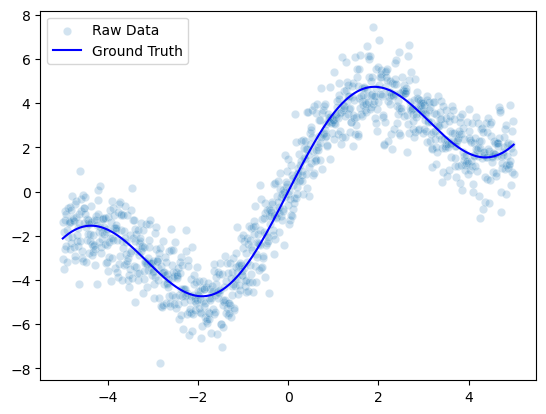

In [3]:
# Simulate data
sample_size = 1000
x = np.linspace(-5, 5, sample_size)
ground_truth = 3*np.sin(x) + x
noise = np.random.normal(0, 1.0, sample_size)
y = ground_truth + noise

# Scatter plot of raw data and ground truth function
sns.scatterplot(x=x, y=y, label='Raw Data', alpha=0.2)
sns.lineplot(x=x, y=ground_truth, color='blue', label='Ground Truth')

In [8]:
# Construct a PyTorch model
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.layer1 = nn.Linear(1, 1000)
        self.layer2 = nn.ReLU()
        self.layer3 = nn.Linear(64, 64)
        self.layer4 = nn.ReLU()
        self.layer5 = nn.Linear(64, 1)

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.layer5(x)
        return x

model = SimpleNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)



Epoch: 1, Loss: 11.664161682128906


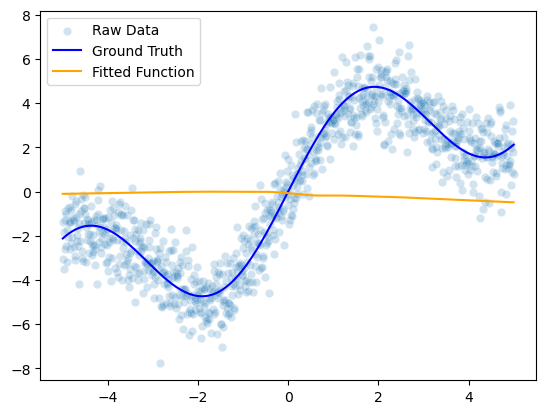

Epoch: 11, Loss: 5.003296375274658


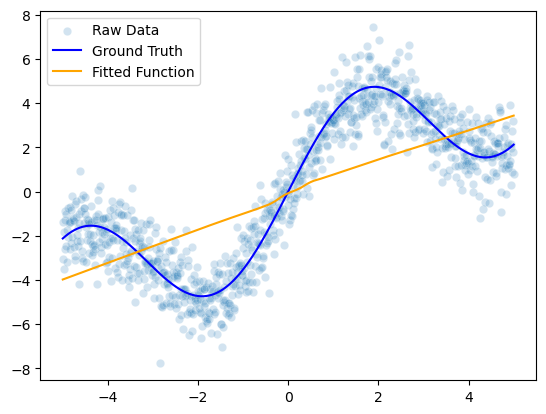

Epoch: 21, Loss: 15.350212097167969


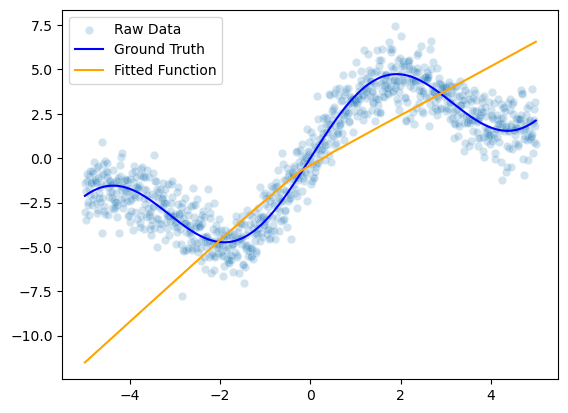

Epoch: 31, Loss: 8.399371147155762


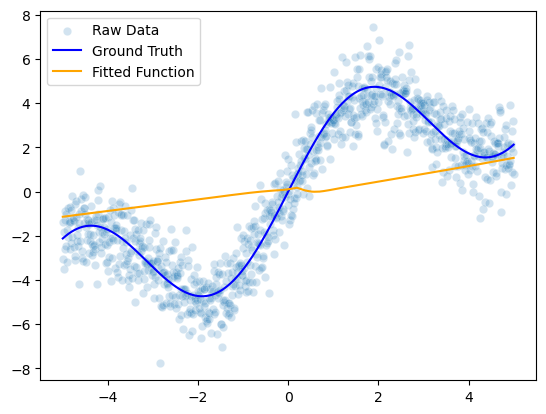

Epoch: 41, Loss: 5.458218574523926


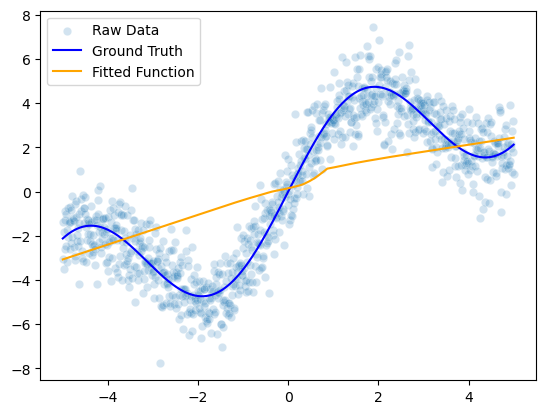

Epoch: 51, Loss: 4.206653594970703


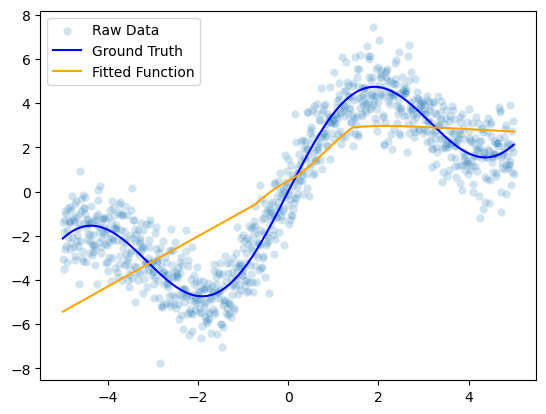

Epoch: 61, Loss: 3.3029673099517822


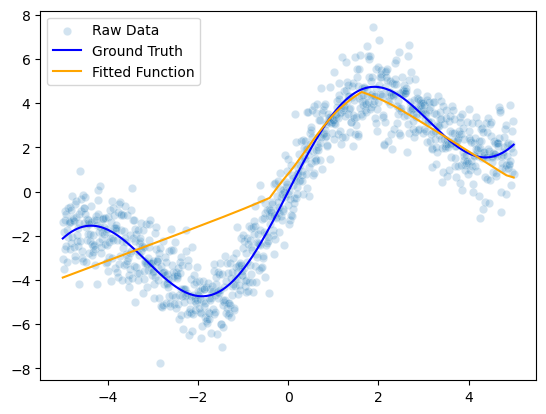

Epoch: 71, Loss: 2.9283194541931152


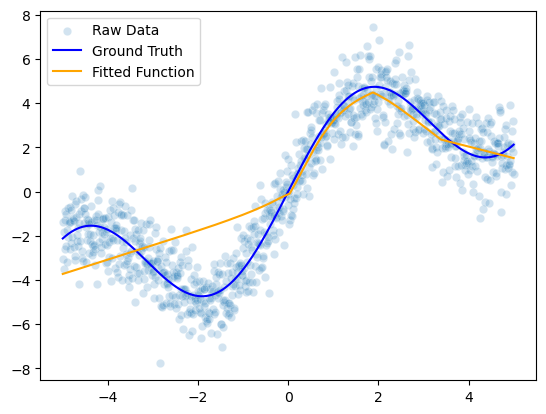

Epoch: 81, Loss: 2.5739927291870117


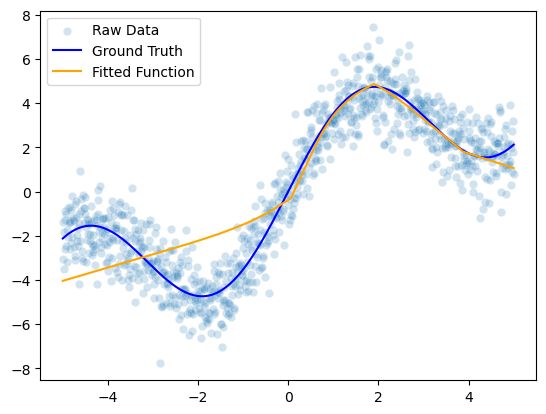

Epoch: 91, Loss: 2.171626329421997


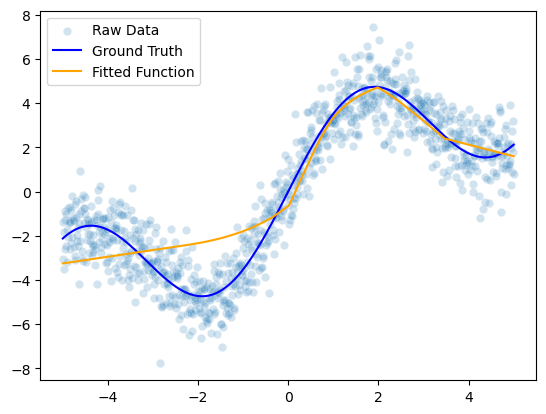

In [9]:
# Training
x_tensor = torch.tensor(x.reshape(-1, 1), dtype=torch.float32)
y_tensor = torch.tensor(y.reshape(-1, 1), dtype=torch.float32)

epochs = 100
for epoch in range(epochs):
    optimizer.zero_grad()
    predictions = model(x_tensor)
    loss = criterion(predictions, y_tensor)
    loss.backward()
    optimizer.step()

    if (epoch) % 10 == 0:
        print(f"Epoch: {epoch+1}, Loss: {loss.item()}")
        y_pred = predictions.detach().numpy()
        sns.scatterplot(x=x, y=y, label='Raw Data', alpha=0.2)
        sns.lineplot(x=x, y=ground_truth, color='blue', label='Ground Truth')
        sns.lineplot(x=x, y=y_pred.squeeze(), color='orange', label='Fitted Function')
        plt.legend()
        plt.show()